
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of generic asset classes and asset subclasses.  Construct portfolios of generic asset classes and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['asset-class-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,US Stocks,US Stocks,58.27,69.15,22.85,17.89,19.15,16.40,10.66,19.26,19.15,0.99
1,Global Stocks,Global Stocks,37.08,73.29,17.52,7.91,12.71,17.05,11.80,18.01,12.71,0.71
2,Bonds,Bonds,3.04,0.89,4.62,5.77,3.85,2.12,1.03,3.33,3.85,1.16
3,Cash Equivalents,Cash Equivalents,-0.13,-0.07,0.23,1.34,0.98,0.11,0.07,0.28,0.98,3.50
4,Real Estate,Real Estate,182.50,45.22,-4.33,11.73,8.93,14.32,7.15,18.03,8.93,0.50
5,Commodities,Commodities,118.78,119.38,11.76,0.51,6.47,13.36,7.38,19.43,6.47,0.33
6,Currencies,Currencies,15.36,12.67,1.74,2.62,2.22,4.80,3.09,6.91,2.22,0.32
7,Balanced,Balanced,17.28,23.26,10.07,8.38,8.59,7.24,5.11,7.64,8.59,1.12
8,Risk-Free Asset,Risk-Free Asset,-0.13,-0.07,0.23,1.34,0.98,0.11,0.07,0.28,0.98,3.50
9,US Stocks:Large Cap,US Stocks:Large Cap,42.70,49.02,18.52,17.00,18.30,16.10,10.59,18.22,18.30,1.00


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
12,US Stocks:Growth,US Stocks:Growth,97.38,78.03,44.24,30.40,29.23,20.13,11.69,20.01,29.23,1.46
19,US Stocks:Technology,US Stocks:Technology,83.03,64.52,37.14,31.79,30.52,19.44,10.39,20.91,30.52,1.46
14,US Stocks:Total Stock Market,US Stocks:Total Stock Market,59.62,68.84,22.99,18.03,19.29,15.86,10.11,19.15,19.29,1.01
8,Risk-Free Asset,Risk-Free Asset,-0.13,-0.07,0.23,1.34,0.98,0.11,0.07,0.28,0.98,3.50
37,Real Estate:REIT,Real Estate:REIT,171.38,36.78,-5.94,11.06,9.76,14.20,6.57,17.92,9.76,0.54
4,Real Estate,Real Estate,182.50,45.22,-4.33,11.73,8.93,14.32,7.15,18.03,8.93,0.50
38,Real Estate:Real Estate Funds,Real Estate:Real Estate Funds,182.50,45.22,-4.33,11.73,8.93,14.32,7.15,18.03,8.93,0.50
27,Global Stocks:Emerging Markets,Global Stocks:Emerging Markets,98.36,104.78,31.46,10.14,16.81,21.02,13.17,19.50,16.81,0.86
25,Global Stocks:Asia,Global Stocks:Asia,26.17,72.94,22.38,8.78,13.55,16.90,12.33,16.60,13.55,0.82
1,Global Stocks,Global Stocks,37.08,73.29,17.52,7.91,12.71,17.05,11.80,18.01,12.71,0.71


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# Put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'US Stocks': 0.50,
    'Bonds': 0.50
}

# Put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'US Stocks': 0.50,
    'Cash Equivalents:Treasury Bills': 0.50
}

# Top Dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'US Stocks:Technology': 1/7,
    'Real Estate:REIT': 1/7,
    'Global Stocks:Asia': 1/7,
    'Currencies:Japanese Yen': 1/7,
    'Commodities:Palladium': 1/7,
    'Cash Equivalents:Short Term Gov Bonds': 1/7,
    'Bonds': 1/7
    
}

# 50% S&P 500, 50% bonds
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'US Stocks': 1/2,
    'Bonds': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'US Stocks:Large Cap': 1/3,
    'Bonds': 1/3,
    'Bonds:Investment Grade': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'US Stocks:Large Cap': 1/4,
    'US Stocks:Growth': 1/4,
    'US Stocks:Technology': 1/4,
    'Global Stocks': 1/4 
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'US Stocks:Large Cap': 0.90,
    'Cash Equivalents:Treasury Bills': 0.10
}

# Janet Yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'Bonds:Investment Grade': 0.50,
    'US Stocks:Large Cap': 0.40,
    'Cash Equivalents:Money Markets': 0.10
}

# Risk Off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'Cash Equivalents:Treasury Bills': 1/3,
    'Bonds': 1/3,
    'Cash Equivalents:Money Markets': 1/3
}

# Risk On: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'US Stocks:Large Cap': 1/3,
    'Global Stocks:Emerging Markets':1/3,
    'US Stocks:Small Cap': 1/3
}

# Everything Ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',
    'US Stocks:Technology': 1/8,
    'US Stocks:Growth': 1/8,
    'Real Estate:REIT': 1/8,
    'Currencies:Japanese Yen': 1/8,
    'Currencies:Chinese Yuan': 1/8,
    'Bonds': 1/8,
    'Bonds:Investment Grade': 1/8,
    'Bonds:High Yield': 1/8
}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = age_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Equal',
                          'US Stocks': 1/2},
    'Asset Subclass':    {'weight_by': None,
                          'Bonds:High Yield': 1/2},
    'Investment Option': {'weight_by': 'Sharpe Ratio'},
}
weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,US Stocks,Bonds,Age Portfolio
Annual Returns,19.15,3.85,11.50
Std Dev,19.26,3.33,10.03
Sharpe Ratio,0.99,1.16,1.15
Weight,0.50,0.50,1.00
Worst Typical Down Year,-19.37,-2.81,-8.56
Black Swan,-38.63,-6.14,-18.60


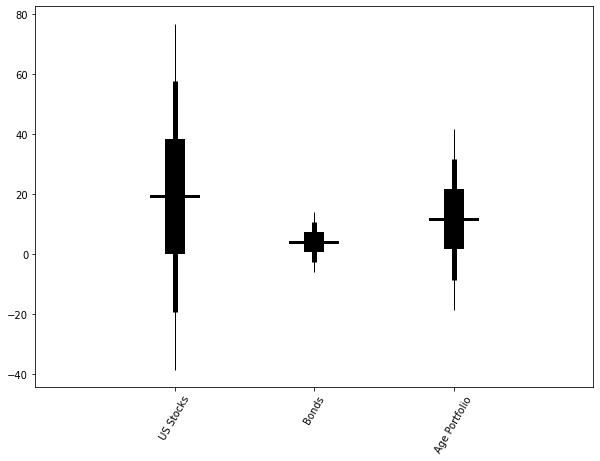

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

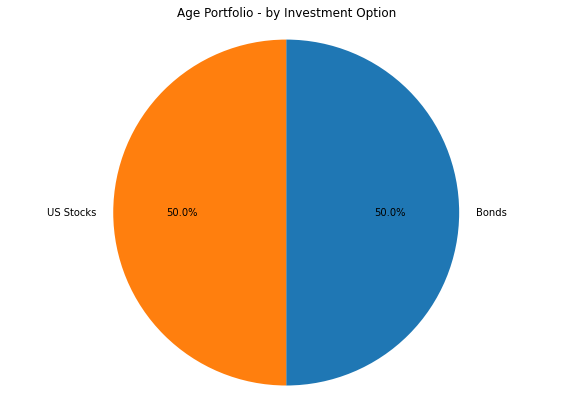

Bonds       0.50
US Stocks   0.50



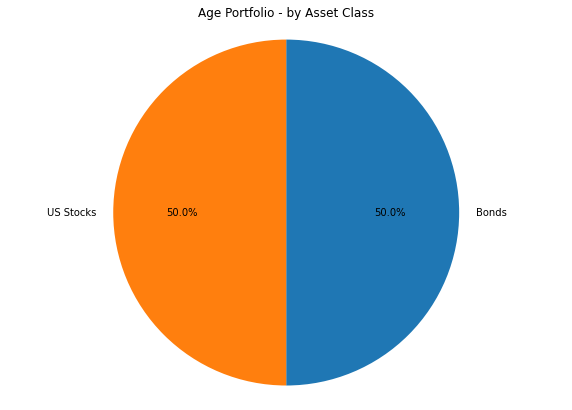

Bonds       0.50
US Stocks   0.50



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Age Portfolio Weights:
    US Stocks                      0.5000
    Bonds                          0.5000


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -20
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.........

Age Portfolio Metrics:              
    max_sharpe_ratio            1.31
    annual_return               7.98
    std_dev                     6.08
    worst typical down year    -4.18
    black_swan                -10.27


Age Portfolio Weights:
    US Stocks                      0.2700
    Bonds                          0.7300



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).